<div class="alert alert-block alert-info">

# Notebook to fit ITC equations using an obligate heterotrimer binding model (for CSL, ANK, and MAML)  <br>
### Fitted by analytical solution

Concentrations of CSL are $[P_0]=2 \times 10^{-6} M$, MAML in the syringe is $[x_0]=20 \times 10^{-6} M$, and ANK in the cell varies but e.g. is at $[y_0]=8 \times 10^{-6} M$.

The binding polynomial is the following: 
    
$1 + \beta_{M,A} \times [M] \times [A]$

[M] = MAML <br>
[A] = ANK <br>


Note: solving with trig form of solution for some total protein concentrations creates arccos errors (e.g. when excess cell ligand (y) concentration is 4 μM, titrant concentration (x) is 20 μM, and limiting cell ligand (M) is 2 μM).  In those cases, solve with numerical solution .ipynb.  

In [1]:
import numpy as np
import sympy as sym
from sympy import cos, sqrt, acos, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from numpy import array
import math
from sympy import Symbol
from lmfit import Parameters, minimize, report_fit, fit_report

In [2]:
M0, x0, y0, Mxy, Mt, xt, yt, K, DH, Vc, Vi, i, xcomp, dilu, DG = sym.symbols("M0 x0 y0 Mxy Mt xt yt K DH Vc Vi i xcomp dilu DG")

In [3]:
# M is CSL and y is ANK; both are in the calorimeter cell
# x is MAML, in the calorimeter syringe

# Dilution of macromolecule and ligand as a function of injection number i
Mt = M0 * (1 - Vi/Vc)**i
xt = xcomp*x0 * (1 - (1 - Vi/Vc)**i )
yt = y0 * (1 - Vi/Vc)**i

# Coefficients of the quadratic equation in Mxy
a = 1
b = -(Mt + xt + yt)
c = Mt*yt + xt*yt + Mt*xt + 1/K
d = -Mt*xt*yt

In [4]:
# The p and the q value of the depressed cubic (of the form t^3 + p*t + q = 0)
p = (3*a*c - b**2)/(3*a**2)
q = (2*b**3 - 9*a*b*c + 27*(a**2)*d)/((27*a**3))

In [5]:
troot = 2*((-p/3)**.5)*cos(1/3*acos(3*q/(2*p)*((-3/p)**.5))-2*pi*2/3)

In [6]:
Mxy = troot - b/(3*a)
Mxyminus1 = Mxy.subs(i, i-1)

In [7]:
q = Vc * DH * (Mxy - Mxyminus1 * (1 - Vi/Vc)) + dilu

In [8]:
qsubs = q.subs([(M0, 2*10**-6), (Vc, 1.4*10**-3), (Vi, 8*10**-6), (K, sym.exp(DG/(.001987*298.15)))])

<div class="alert alert-block alert-info">

## convert sympy expression to one that can be evaluated numerically

In [9]:
q_fit_eqn = sym.lambdify([i, DG, x0, y0, DH, xcomp, dilu], qsubs, 'numpy')

<div class="alert alert-block alert-info">

## import data 
(hardcoded the file name and deleted all columns except (NDH), then multiplied by (concentration of injectant)x(volume of injectant); data is then in units of calories)

In [10]:
x = np.arange(1, 31)

In [11]:
data1=np.genfromtxt('20230516exp3M1WintoCSLandANKas20into2and8at200mMNaClat25C - corr.csv',delimiter=',')

In [12]:
data2=np.genfromtxt('20240125exp1M1WintoCSLandANKas20into2and22at200mMNaClat25C - corr.csv',delimiter=',')

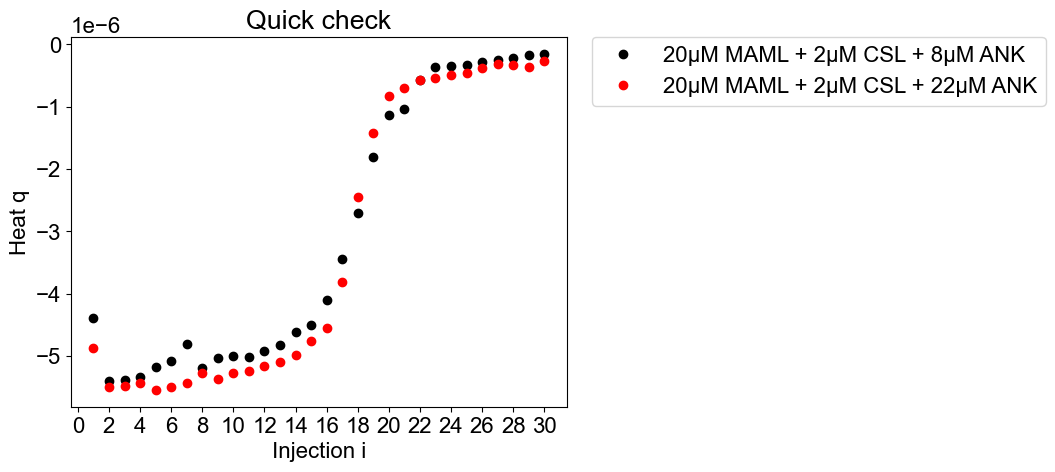

In [13]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

plt.plot(x, data1,'o',color=(0,0,0),label='20μM MAML + 2μM CSL + 8μM ANK') #
plt.plot(x, data2,'o',color=(1,0,0),label='20μM MAML + 2μM CSL + 22μM ANK') #

plt.legend()
plt.title('Quick check')
plt.xlabel('Injection i')
plt.ylabel('Heat q')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)

plt.xticks(np.arange(0, len(x)+1, step=2));

In [14]:
data = np.vstack((data1,data2))
data

array([[-4.38407e-06, -5.40083e-06, -5.38672e-06, -5.34424e-06,
        -5.17982e-06, -5.07721e-06, -4.81027e-06, -5.19874e-06,
        -5.03961e-06, -4.99559e-06, -5.01652e-06, -4.92092e-06,
        -4.82613e-06, -4.61030e-06, -4.50621e-06, -4.10219e-06,
        -3.44434e-06, -2.71179e-06, -1.80318e-06, -1.13255e-06,
        -1.04741e-06, -5.70703e-07, -3.73649e-07, -3.49800e-07,
        -3.31929e-07, -2.93320e-07, -2.47197e-07, -2.25710e-07,
        -1.70911e-07, -1.54452e-07],
       [-4.87201e-06, -5.50192e-06, -5.48836e-06, -5.43991e-06,
        -5.54426e-06, -5.49122e-06, -5.43779e-06, -5.27166e-06,
        -5.36319e-06, -5.26648e-06, -5.24575e-06, -5.16068e-06,
        -5.10199e-06, -4.97981e-06, -4.75819e-06, -4.54755e-06,
        -3.81783e-06, -2.45034e-06, -1.41645e-06, -8.38249e-07,
        -6.97064e-07, -5.68832e-07, -5.36189e-07, -4.87485e-07,
        -4.69520e-07, -3.79026e-07, -3.21907e-07, -3.31371e-07,
        -3.68306e-07, -2.74455e-07]])

<div class="alert alert-block alert-info">

## use Minimize to fit multiple data sets with both local and global parameters

In [15]:
from lmfit import minimize, Parameters, report_fit

In [16]:
def q_dataset(params, i, x):
    DG = params['DG_%i' % (i+1)].value
    x0 = params['x0_%i' % (i+1)].value
    y0 = params['y0_%i' % (i+1)].value
    DH = params['DH_%i' % (i+1)].value
    xcomp = params['xcomp_%i' % (i+1)].value
    dilu = params['dilu_%i' % (i+1)].value
    return q_fit_eqn(x,DG,x0,y0,DH,xcomp,dilu)

<div class="alert alert-block alert-info">
    
## remove first data point from each data set

In [17]:
data_skip1st = [sublist[1:] for sublist in data]
data_skip1st

[array([-5.40083e-06, -5.38672e-06, -5.34424e-06, -5.17982e-06,
        -5.07721e-06, -4.81027e-06, -5.19874e-06, -5.03961e-06,
        -4.99559e-06, -5.01652e-06, -4.92092e-06, -4.82613e-06,
        -4.61030e-06, -4.50621e-06, -4.10219e-06, -3.44434e-06,
        -2.71179e-06, -1.80318e-06, -1.13255e-06, -1.04741e-06,
        -5.70703e-07, -3.73649e-07, -3.49800e-07, -3.31929e-07,
        -2.93320e-07, -2.47197e-07, -2.25710e-07, -1.70911e-07,
        -1.54452e-07]),
 array([-5.50192e-06, -5.48836e-06, -5.43991e-06, -5.54426e-06,
        -5.49122e-06, -5.43779e-06, -5.27166e-06, -5.36319e-06,
        -5.26648e-06, -5.24575e-06, -5.16068e-06, -5.10199e-06,
        -4.97981e-06, -4.75819e-06, -4.54755e-06, -3.81783e-06,
        -2.45034e-06, -1.41645e-06, -8.38249e-07, -6.97064e-07,
        -5.68832e-07, -5.36189e-07, -4.87485e-07, -4.69520e-07,
        -3.79026e-07, -3.21907e-07, -3.31371e-07, -3.68306e-07,
        -2.74455e-07])]

In [18]:
def objective(params, x, data_skip1st):
    
    ndata, nx = data_skip1st.shape
    resid = 0.0*data[:]
    
    for i in range(ndata):
        resid[i, :] = data_skip1st[i, :] - q_dataset(params,i,x)
    
    return resid.flatten()


In [19]:
data = np.array(data_skip1st)
assert(data.shape) == (2,29)

fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('DG_%i' % (iy+1), value=18, min=0.0, max=np.inf)
    fit_params.add('x0_%i' % (iy+1), value=20*10**-6, min=0, max=1)
    fit_params.add('y0_%i' % (iy+1), value=8*10**-6, min=0, max=1)
    fit_params.add('DH_%i' % (iy+1), value=-35000, min=-np.inf, max=0)
    fit_params.add('xcomp_%i' % (iy+1), value=1, min=0.3, max=2)
    fit_params.add('dilu_%i' % (iy+1), value=.00000005, min=-np.inf, max=.0001)

In [20]:
for iy in (2,):
    fit_params['DG_%i' % iy].expr = 'DG_1'
    fit_params['DH_%i' % iy].expr = 'DH_1'

<div class="alert alert-block alert-info">

set values for excess cell ligand

In [22]:
fit_params['y0_1'].value=8*10**-6
fit_params['y0_2'].value=22*10**-6

fit_params['y0_1'].vary=False
fit_params['y0_2'].vary=False


<div class="alert alert-block alert-info">

set values for titrant in the syringe

In [23]:
fit_params['x0_1'].value=20*10**-6
fit_params['x0_2'].value=20*10**-6

fit_params['x0_1'].vary=False
fit_params['x0_2'].vary=False


<div class="alert alert-block alert-info">

### Check fitting parameters

In [24]:
fit_params

name,value,initial value,min,max,vary,expression
DG_1,18.0000000,18,0.00000000,inf,True,
x0_1,2.0000e-05,1.9999999999999998e-05,0.00000000,1.00000000,False,
y0_1,8.0000e-06,8e-06,0.00000000,1.00000000,False,
DH_1,-35000.0000,-35000,-inf,0.00000000,True,
xcomp_1,1.00000000,1,0.30000000,2.00000000,True,
dilu_1,5.0000e-08,5e-08,-inf,1.0000e-04,True,
DG_2,18.0000000,18,0.00000000,inf,False,DG_1
x0_2,2.0000e-05,1.9999999999999998e-05,0.00000000,1.00000000,False,
y0_2,2.2000e-05,8e-06,0.00000000,1.00000000,False,
DH_2,-35000.0000,-35000,-inf,0.00000000,False,DH_1


In [25]:
x_skip1st = x[1:]

<div class="alert alert-block alert-info">

run the global fit to all the data sets

In [26]:
result = minimize(objective, fit_params, args=(x_skip1st, data),nan_policy='raise')

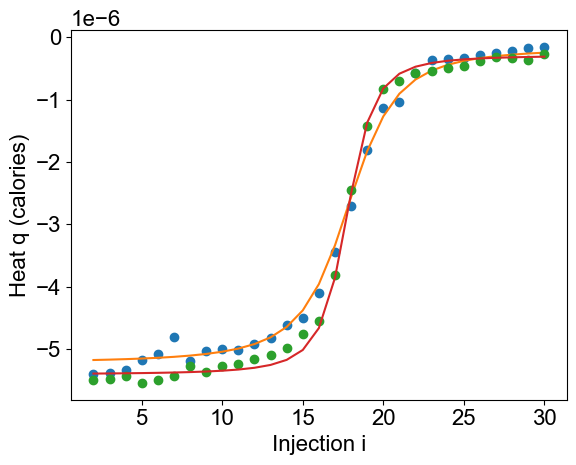

In [27]:
# plot the data sets and fits
plt.figure()
for i in range(2):
    y_fit = q_dataset(result.params, i, x_skip1st)
    plt.plot(x_skip1st, data[i, :], 'o', x_skip1st, y_fit, '-')
plt.xlabel('Injection i')
plt.ylabel('Heat q (calories)')
plt.show()

In [28]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
DG_1,17.8085412,0.05384219,(0.30%),18,0.00000000,inf,True,
x0_1,2.0000e-05,0.00000000,(0.00%),1.9999999999999998e-05,0.00000000,1.00000000,False,
y0_1,8.0000e-06,0.00000000,(0.00%),8e-06,0.00000000,1.00000000,False,
DH_1,-33395.5146,353.356287,(1.06%),-35000,-inf,0.00000000,True,
xcomp_1,0.94345907,0.00498914,(0.53%),1,0.30000000,2.00000000,True,
dilu_1,-1.7232e-07,3.5664e-08,(20.70%),5e-08,-inf,1.0000e-04,True,
DG_2,17.8085412,0.05384219,(0.30%),18,0.00000000,inf,False,DG_1
x0_2,2.0000e-05,0.00000000,(0.00%),1.9999999999999998e-05,0.00000000,1.00000000,False,
y0_2,2.2000e-05,0.00000000,(0.00%),2.2e-05,0.00000000,1.00000000,False,
DH_2,-33395.5146,353.356288,(1.06%),-35000,-inf,0.00000000,False,DH_1


<div class="alert alert-block alert-info">

## make final plot of fit

In [29]:
data1_skip1st = data1[1:]
data2_skip1st = data2[1:]

In [30]:
x2 = np.arange(2,30,0.1)

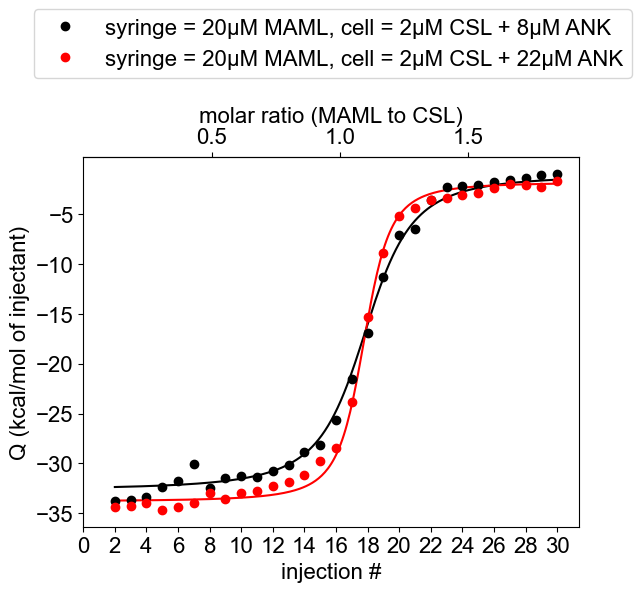

In [35]:
f, ax = plt.subplots()

fit0=q_dataset(result.params, 0, x2)
fit1=q_dataset(result.params, 1, x2)

ax.plot(x2,fit0*10**-3/(2*10**-5*8*10**-6),color=(0,0,0))
ax.plot(x2,fit1*10**-3/(2*10**-5*8*10**-6),color=(1,0,0))

ax.plot(x_skip1st, data1_skip1st*10**-3/(2*10**-5*8*10**-6),'o',color=(0,0,0),label='syringe = 20μM MAML, cell = 2μM CSL + 8μM ANK')
ax.plot(x_skip1st, data2_skip1st*10**-3/(2*10**-5*8*10**-6),'o',color=(1,0,0),label='syringe = 20μM MAML, cell = 2μM CSL + 22μM ANK') 

ax.legend()

ax.set_ylabel('Q (kcal/mol of injectant)')

# change x-axis from injection # to molar ratio of MAML and CSL given titration of 20 μM into 2 μM
def inj2ratio(x):
    y = 0.00018019*x**2 + 0.05581621*x + 0.00084155
    return y

def yday2date(x):
    y = x
    return y

secaxx = ax.secondary_xaxis('top', functions=(inj2ratio, yday2date))
secaxx.set_xlabel('molar ratio (MAML to CSL)')
ax.set_xlabel('injection #')

ax.set_xticks(np.arange(0, len(x)+1, step=2));

plt.yticks(np.arange(-35,0,5))

plt.legend(bbox_to_anchor=(-.1,1.4),loc='upper left', borderaxespad=0)

plt.savefig('plot_of_fit.png', bbox_inches='tight',dpi=400)